## ДИСКРЕТНАЯ МАТЕМАТИКА  <br/>
# Семинар 3 <br/>
**Голев Александр 135М**


In [66]:
import matplotlib.pyplot as plt
import numpy as np
from random import random

import itertools
import pandas as pd
import sympy as sp

---
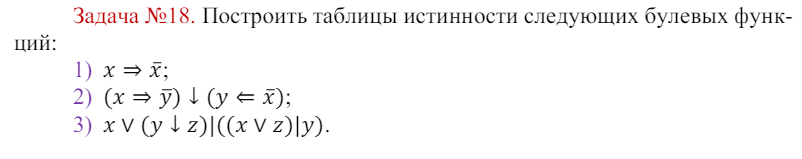

In [32]:
import numpy as np

def log_or(x,y):
    return 1 if (x+y>0) else 0

def log_and(x,y):
    return x*y

def log_nand(x,y):
    return 0 if (x+y>1) else 1

def log_nor(x,y):
    return 1 if (x+y==0) else 0



x, x_1, x_2, x_3 = [0,1], [],[],[]

#1)
x_1 = [log_or(e,e) for e in x]


T = pd.DataFrame({'x': x, '𝑥 ⇒ 𝑥̅': x_1})
display(T)

#2)
x = [0,0,1,1]
y = [0,1,0,1]
x_2 = [log_and(e,f) for e,f in zip(x,y)]

T = pd.DataFrame({'x': x,'y': y,  '(𝑥 ⇒ 𝑦̅) ↓ (𝑦 ⇐ 𝑥̅)': x_2})
display(T)

#3)
x = [0,0,0,0,1,1,1,1]
y = [0,0,1,1,0,0,1,1]
z = [0,1,0,1,0,1,0,1]

t = [log_or(e,f) for e,f in zip(x,z)] # x ∨ z
w = [log_nand(e,f) for e,f in zip(t,y)] # t | y
v = [log_nor(e,f) for e,f in zip(y,z)] # 𝑦 ↓ z
u = [log_nand(e,f) for e,f in zip(v,w)] # v | w
x_3 = [log_or(e,f) for e,f in zip(x,u)] # x ∨ u

T = pd.DataFrame({'x': x,'y': y,'z': z,'t': t,'w': w,'v': v,'u': u,  '𝑥 ∨ (𝑦 ↓ 𝑧)|((𝑥 ∨ 𝑧)|𝑦) ': x_3})
display(T)


,x,𝑥 ⇒ 𝑥̅
0,0,0
1,1,1


,x,y,(𝑥 ⇒ 𝑦̅) ↓ (𝑦 ⇐ 𝑥̅)
0,0,0,0
1,0,1,0
2,1,0,0
3,1,1,1


,x,y,z,t,w,v,u,𝑥 ∨ (𝑦 ↓ 𝑧)|((𝑥 ∨ 𝑧)|𝑦)
0,0,0,0,0,1,1,0,0
1,0,0,1,1,1,0,1,1
2,0,1,0,0,1,0,1,1
3,0,1,1,1,0,0,1,1
4,1,0,0,1,1,1,0,1
5,1,0,1,1,1,0,1,1
6,1,1,0,1,0,0,1,1
7,1,1,1,1,0,0,1,1


---
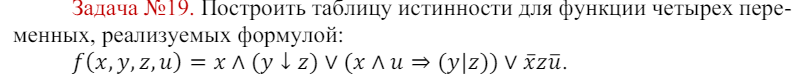

In [44]:
xx,yy,zz,uu,ff = [], [],[],[],[]
logic_el = [0,1]

def log_not(x):
    return 1 if x == 0 else 0

def log_implic(x,y):
    return 0 if x == 1 and y == 0 else 1

for comb in itertools.product(logic_el, logic_el, logic_el,logic_el):
    x,y,z,u = comb
    xx.append(x)
    yy.append(y)
    zz.append(z)
    uu.append(u)

    f1 = log_nor(y,z)
    f2 = log_implic(log_and(x,u),log_nand(y,z))
    f3 = log_and(x,log_and(z,log_not(u)))
    
    ff.append(log_or(log_and(x,f1),log_or(f2,f3) ))

T = pd.DataFrame({'x': xx,'y': yy,'z': zz,'u': uu,  'f(x,y,z,u)': ff})
display(T)    


,x,y,z,u,"f(x,y,z,u)"
0,0,0,0,0,1
1,0,0,0,1,1
2,0,0,1,0,1
3,0,0,1,1,1
4,0,1,0,0,1
5,0,1,0,1,1
6,0,1,1,0,1
7,0,1,1,1,1
8,1,0,0,0,1
9,1,0,0,1,1


---
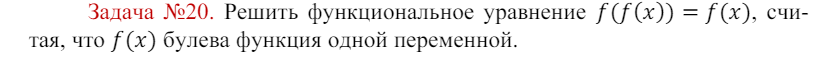

Всего существует 4 булевых функции одной переменной, а именно 𝑓(𝑥) = {0, 𝑥, 𝑥̅, 1}. 
Непосредственной проверкой можно убедиться, что функциональному уравнению удовлетворяет три функции из четырех, а именно **0, 𝑥, 1**:
1) f(f(x)) = f(0) =  0 = f(x)
2) f(f(x)) = f(x) = x = f(x)
3) f(f(x)) = f(𝑥̅) **!=** 𝑥̅ = f(x)
4) f(f(x)) = f(0) =  1 = f(x)

---
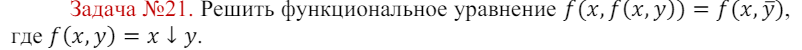

f(x,f(x,y)) = f(x,𝑥̅ ∧ 𝑦̅) = f(x,𝑥̅ ∧ 𝑦̅) = x ↓ (𝑥̅ ∧ 𝑦̅) = 𝑥̅ ∧ (x ∨ y) = 0 ∨ (𝑥̅ ∧ y) = 𝑥̅ ∧ y= x ↓ 𝑦̅ = f(x,𝑦̅).

**Ответ:** функциональное уравнение верно при любых наборах переменных.


---
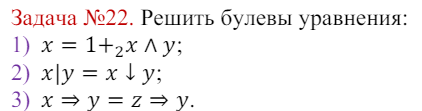

In [52]:
a_1, a_2,a_3 = [],[],[]
logic_el = [0,1]

def log_2or(x,y):
    return (x+y)%2

def print_set(x):
    return f"({','.join([str(y) for y in x])})"

for comb in itertools.product(logic_el, logic_el):
    x,y = comb

    # 𝑥 = 1+2𝑥 ∧ 𝑦
    if (x == log_2or(1,log_and(x,y))):
        a_1.append([x,y])

    # 𝑥|𝑦 = 𝑥 ↓ y
    if (log_nand(x,y) == log_nor(x,y)):
        a_2.append([x,y])

for comb in itertools.product(logic_el, logic_el, logic_el):
    x,y,z = comb

    # 𝑥 ⇒ 𝑦 = 𝑧 ⇒ y
    if(log_implic(x,y) == log_implic(z,y)):
        a_3.append([x,y,z])

print('1) ', ' '.join([print_set(x) for x in a_1]))
print('2) ', ' '.join([print_set(x) for x in a_2]))
print('3) ', ' '.join([print_set(x) for x in a_3]))

1)  (1,0)
2)  (0,0) (1,1)
3)  (0,0,0) (0,1,0) (0,1,1) (1,0,1) (1,1,0) (1,1,1)


---
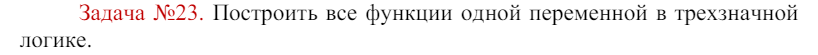

In [56]:
# Возможные значения в трехзначной логике
values = [0, 1, 2]

# Генерация всех возможных функций одной переменной в трехзначной логике
functions = list(itertools.product(values, repeat=3))

# Построение таблицы всех функций
columns = ['x', 'f(0)', 'f(1)', 'f(2)']
rows = []

for i, func in enumerate(functions):
    rows.append([i] + list(func))

# Создание DataFrame и вывод таблицы
df = pd.DataFrame(rows, columns=columns)
print(df.to_string(index=False))

 x  f(0)  f(1)  f(2)
 0     0     0     0
 1     0     0     1
 2     0     0     2
 3     0     1     0
 4     0     1     1
 5     0     1     2
 6     0     2     0
 7     0     2     1
 8     0     2     2
 9     1     0     0
10     1     0     1
11     1     0     2
12     1     1     0
13     1     1     1
14     1     1     2
15     1     2     0
16     1     2     1
17     1     2     2
18     2     0     0
19     2     0     1
20     2     0     2
21     2     1     0
22     2     1     1
23     2     1     2
24     2     2     0
25     2     2     1
26     2     2     2


---
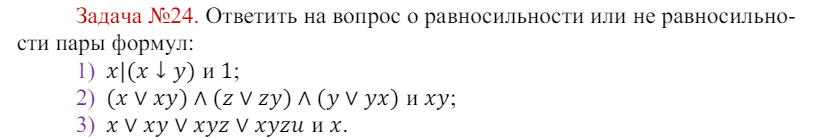

1) x|(x ↓ y) = x | (𝑥̅ ∧ 𝑦̅) = 𝑥̅ ∨ (x ∨ y) = 1 ∨ y **= 1**
2) (𝑥 ∨ 𝑥𝑦) ∧ (𝑧 ∨ 𝑧𝑦) ∧ (𝑦 ∨ 𝑦𝑥)  = (xz ∨ xzy ∨ zxy ∨ xyzy) ∧ (𝑦 ∨ 𝑦𝑥) = (yxz ∨ yxzy ∨ yzxy ∨ yxyzy ∨ yxxy ∨ yxxzy ∨ yxzxy ∨ yxxyzy) = (xyz ∨ xyz ∨ xyz ∨ xyz ∨ xy ∨ xyz ∨ xyz ∨ xyz) =  **xyz != xy**
3) 𝑥 ∨ 𝑥𝑦 ∨ 𝑥𝑦𝑧 ∨ 𝑥𝑦𝑧u = x ∧ (1 ∨ y ∨ yz ∨ yzu) = x ∧ 1 **= x**

Ответ: 1) да; 2) нет; 3) да.

---
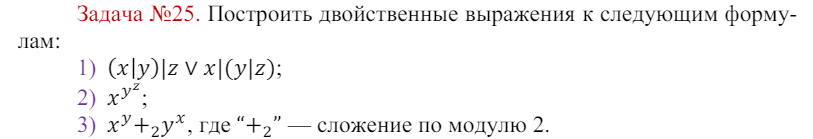

In [61]:
xx,yy,zz,ff1, ff2, ff2_prove, ff3 = [], [],[],[],[],[], []
logic_el = [0,1]

def log_pow(x,y):
    return x if y==1 else log_not(x)


for comb in itertools.product(logic_el, logic_el, logic_el):
    x,y,z = comb
    xx.append(x)
    yy.append(y)
    zz.append(z)

    ff1.append(log_or(log_nand(log_nand(x,y),z),log_nand(x,log_nand(y,z))))
    ff2.append(log_pow(x,log_pow(y,z)))
    ff3.append(log_2or(log_pow(x,y), log_pow(y,x)))

    f1 = log_or(log_not(x), log_or(log_and(y,z),log_and(log_not(y),log_not(z))))
    f2 = log_or(x, log_and(log_or(y,z), log_not(log_and(y,z))))
    ff2_prove.append(log_and(f1, f2))

T = pd.DataFrame({'x': xx,'y': yy,'z': zz,'f1': ff1,'f3': ff3,'f2': ff2,'f2 prove': ff2_prove})
display(T)    


,x,y,z,f1,f3,f2,f2 prove
0,0,0,0,1,0,0,0
1,0,0,1,1,0,1,1
2,0,1,0,1,0,1,1
3,0,1,1,1,0,0,0
4,1,0,0,1,0,1,1
5,1,0,1,0,0,0,0
6,1,1,0,1,0,0,0
7,1,1,1,1,0,1,1


Из 5-ого случая ясно, что двойственная функция для **1) -> 𝑥̅𝑦𝑧̅**

Очевидно, для **3) - 1**

Для **2) -> (𝑥 ∨ (𝑦 ∨ 𝑧) ∧ (𝑦̅ ∨ 𝑧̅)) ∧ (𝑥̅∨ 𝑦𝑧 ∨ 𝑦̅𝑧̅)**. Ответ проверен!



---
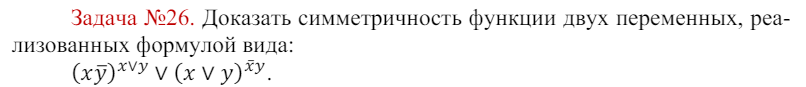

In [65]:
xx,yy,ff, ff_prove = [], [],[], []
logic_el = [0,1]

def log_pow(x,y):
    return x if y==1 else log_not(x)


for comb in itertools.product(logic_el, logic_el):
    x,y = comb
    xx.append(x)
    yy.append(y)

    f1 = log_pow(log_and(x,log_not(y)), log_or(x,y))
    f2 = log_pow(log_or(x,y), log_and(log_not(x),y))

    ff.append(log_or(f1,f2))
    ff_prove.append(log_or(log_not(x),log_not(y)))

T = pd.DataFrame({'x': xx,'y': yy,'f': ff,'f prove': ff_prove})
display(T)   

,x,y,f,f prove
0,0,0,1,1
1,0,1,1,1
2,1,0,1,1
3,1,1,0,0


Из результатов работы програмы подходит **упрощение 𝑥̅∨ 𝑦̅, которое было проверено**. 

Из упрощенного вида с очевидностью следует симметричность исходной формулы.

---
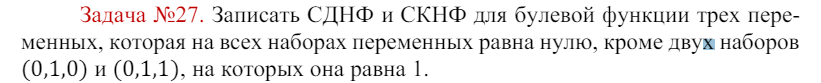

Из определения СДНФ найдем его для (0,1,0),(0,1,1) -> **(𝑥̅𝑦𝑧̅)∨(𝑥̅𝑦z)**

Из определения СДНФ найдем его на наборах (0,0,0), (0,0,1), (1,0,0), (1,0,1), (1,1,0), (1,1,1):</br>
**(𝑥 ∨ 𝑦 ∨ 𝑧) ∧ (𝑥 ∨ 𝑦 ∨ 𝑧̅) ∧ (𝑥̅∨ 𝑦 ∨ 𝑧) ∨ (𝑥̅∨ 𝑦 ∨ 𝑧̅) ∧ (𝑥̅∨ 𝑦̅ ∨ 𝑧) ∧ (𝑥̅∨ 𝑦̅ ∨ 𝑧̅)**.


---
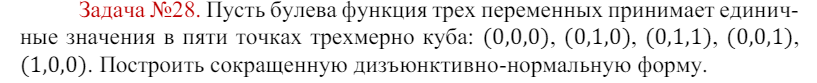

В трех вершинах куба (1,0,1), (1,1,0), (1,1,1) из восьми искомая функция принимает значение ноль.

Выпишем все недопустимые элементарные конъюнкции в виде таблицы:</br>
(1,0,1) - **1 𝑥 𝑦̅ 𝑧 𝑥𝑦̅ 𝑥𝑧 𝑦̅𝑧 𝑥𝑦̅z**</br>
(1,1,0) - **1 𝑥 𝑦 𝑧̅ 𝑥𝑦 𝑥𝑧̅ 𝑦𝑧̅ 𝑥𝑦𝑧̅**</br>
(1,1,1) - **1 𝑥 𝑦 𝑧 𝑥𝑦 𝑥𝑧 𝑦𝑧 𝑥𝑦z**

Выпишем ДНФ искомой формулы, которая состоит из 11/27 элементарных конъюнкций:</br>
**𝑥̅∨ 𝑥̅𝑦 ∨ 𝑥̅𝑦̅ ∨ 𝑥̅𝑧 ∨ 𝑥̅𝑧̅∨ 𝑦̅𝑧̅∨ 𝑥̅𝑦𝑧 ∨ 𝑥̅𝑦̅𝑧 ∨ 𝑥̅𝑦𝑧̅∨ 𝑥𝑦̅𝑧̅∨ 𝑥̅𝑦̅𝑧̅.**

Максимальные конъюнкции:</br>
Kmax1 = 𝑥̅ ⊃ {𝑥̅, 𝑥̅𝑦, 𝑥̅𝑦̅, 𝑥̅𝑧, 𝑥̅𝑧̅, 𝑥̅𝑦𝑧, 𝑥̅𝑦̅𝑧, 𝑥̅𝑦𝑧̅, 𝑥̅𝑦̅𝑧̅}</br>
Kmax2 = 𝑦̅𝑧̅ ⊃ {𝑦̅𝑧̅, 𝑥𝑦̅𝑧̅}</br>

Ответ: **𝑥̅∨ 𝑦̅𝑧̅— искомая сокращенная ДНФ.**

---
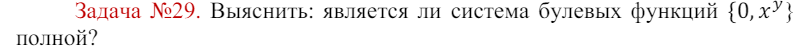

Нужно доказать, что  есть хотя бы одна функция не принадлежащая каждому из пяти классов 𝑇0, 𝑇1, 𝑇∗, 𝑇≤, 𝑇𝐿. 

Очевидно, что константная функция 0 не принадлежит классу 𝑇1. Если
следовать определению второй функции набора, степени в (4), то 0<sup>0</sup> = 1</br>
Константная функция 1, которая **не входит в класс 𝑇0**.

Степень **не является самодвойственной** функцией, т.к. (𝑥<sup>𝑦</sup>)<sup>∗</sup>
 ≠ 𝑥̅̅̅<sup>y</sup>, т.е. 𝑥<sup>y</sup> ∉ 𝑇<sub>∗</sub>.

Покажем, что функция степени **не является монотонной**, т.е. не принадлежит классу 𝑇≤.</br>
Для этого надо подобрать пару наборов таких, что (𝑥1, 𝑦1) ≤ (𝑥2, 𝑦2), при этом 𝑥<sub>1</sub><sup>y<sub>1</sub></sup> > 𝑥<sub>2</sub><sup>y<sub>2</sub></sup>.</br>
Легко проверить непосредственной проверкой, что (0,0) ≤ (0,1),</br>
тогда как 0<sup>0</sup> = 1 > 0<sup>1</sup> = 0, что и доказывает немонотонность функции степени.</br>

Проверим не принадлежность функции степени пятомуклассу, классу линейных функций 𝑇𝐿.

In [67]:
# Определяем переменные
x, y = sp.symbols('x y')

# Определяем функцию степени
def p(x, y):
    return x ** y

# Загружаем наборы двух переменных
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# Перебираем все возможные значения констант c0, c1, c2
cn = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], 
               [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])

# Функция для проверки линейной зависимости
def check_linearity():
    for coeffs in cn:
        c0, c1, c2 = coeffs
        # Определяем текущую линейную функцию двух переменных
        L = c0 + 2 * c1 * x + 2 * c2 * y
        L = sp.simplify(L)

        # Подсчитываем линейную функцию и функцию степени при каждом наборе пар аргументов
        Lt = []
        pat = []
        for pair in X:
            x_val, y_val = pair
            Lt.append(L.subs({x: x_val, y: y_val}))
            pat.append(p(x_val, y_val))
        
        # Выводим линейную функцию, а также ее значения и значения функции степени при каждом наборе пар аргументов
        print(f'L(x, y) = {L}')
        print(f'Lt = {Lt}')
        print(f'pat = {pat}')
        print('-' * 30)

# Проверка линейности
check_linearity()

L(x, y) = 0
Lt = [0, 0, 0, 0]
pat = [1, 0, 1, 1]
------------------------------
L(x, y) = 2*y
Lt = [0, 2, 0, 2]
pat = [1, 0, 1, 1]
------------------------------
L(x, y) = 2*x
Lt = [0, 0, 2, 2]
pat = [1, 0, 1, 1]
------------------------------
L(x, y) = 2*x + 2*y
Lt = [0, 2, 2, 4]
pat = [1, 0, 1, 1]
------------------------------
L(x, y) = 1
Lt = [1, 1, 1, 1]
pat = [1, 0, 1, 1]
------------------------------
L(x, y) = 2*y + 1
Lt = [1, 3, 1, 3]
pat = [1, 0, 1, 1]
------------------------------
L(x, y) = 2*x + 1
Lt = [1, 1, 3, 3]
pat = [1, 0, 1, 1]
------------------------------
L(x, y) = 2*x + 2*y + 1
Lt = [1, 3, 3, 5]
pat = [1, 0, 1, 1]
------------------------------


Функция степени является линейной, а именно представимой в виде:
x<sup>y</sup> = 1 +<sub>2</sub> x +<sub>2</sub> y

Таким образом, получается, что x<sup>y</sup> ∈ 𝑇𝐿.

Последнее означает, что пара функций **{0, x<sup>y</sup>} не является полной**.